# Part 1: Image Text CLIP Embeddings

## Intro demo

Dataset: https://www.kaggle.com/datasets/vikashrajluhaniwal/fashion-images

In [1]:
!cat ../../requirements.txt

transformers
pillow
scipy
torch
requests
numpy
pandas
seaborn
matplotlib
tqdm
torchvision
scikit-learn
memory_profiler
setuptools
librosa
clip


In [2]:
from transformers import CLIPProcessor, CLIPModel
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/Users/alex/pro/zazencodes-youtube/src/multimodal-embeddings/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!ls ~/.cache/huggingface/hub | grep p-vit-base-p

models--openai--clip-vit-base-patch32


In [4]:
clip_model.num_parameters()

151277313

In [5]:
dir(clip_model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_assisted_decoding',
 '_auto_class',
 '_autoset_attn_implementation',
 '_backward_compatibility_gradient_checkpointing',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_beam_sample',
 '_beam_search',
 '_buffers',
 '_call_impl',
 '_check_and_enable_flash_attn_2',
 '_check_and_enable_sdpa',
 '_compiled_call_impl',
 '_constrained_beam_search',
 '_contrastive_search',
 '_convert_head_mask_to_5d',
 '_copy_lm_head_original_to_resized',
 '_create_repo',
 '_dispatch_accelerate_model',
 '_expand_inputs_for_generation',
 

In [6]:
# Function to get text embedding
def get_text_embedding(text: str):
    inputs = clip_processor(text=[text], return_tensors="pt", padding=True)
    text_embeddings = clip_model.get_text_features(**inputs)
    return text_embeddings

In [7]:
get_text_embedding("sdhdfushdd")

tensor([[-2.3496e-02, -2.0307e-01, -1.6436e-02, -1.9392e-01, -1.5396e-01,
          7.6907e-02, -1.1015e-01, -7.6317e-01, -2.1123e-01, -2.2562e-02,
         -5.8856e-02, -2.0092e-01,  1.0576e-02, -4.2504e-01,  2.0734e-01,
          3.8140e-01,  2.9994e-01, -9.5173e-02, -4.6250e-02, -6.6669e-01,
          1.6084e-02, -2.8266e-02,  4.9044e-02,  5.4182e-01, -2.2445e-01,
          3.6633e-01, -2.3881e-02,  6.4708e-02,  1.2103e-01,  2.0221e-01,
          2.7375e-02,  6.3666e-02, -1.0955e-01,  8.1337e-02, -7.6595e-03,
          2.5200e-01,  1.8936e-01,  1.9942e-01,  5.4845e-02, -2.5691e-01,
         -3.4686e-01,  8.6519e-02,  1.3935e-01, -4.5668e-02,  4.2606e-02,
          4.9351e-01,  2.5830e-01, -1.4386e-01,  1.2446e-01, -2.0972e-01,
         -1.9182e-01,  2.9996e-01,  2.6381e-01, -1.0801e-01,  2.5378e-01,
          2.7125e-02, -1.5619e-02,  4.2212e-02,  5.6146e-03, -3.0672e-01,
          3.4840e-01, -1.8189e-01, -8.3700e-02,  1.9374e-01,  6.5805e-02,
          7.8714e-02,  1.6697e-01,  1.

In [8]:
import requests
from PIL import Image

In [9]:
# Function to get image embedding
def get_image_embedding(image_url: str):
    image = Image.open(requests.get(image_url, stream=True, headers={"User-Agent": "AlexCrawler/1.0 (alexgalea.ca; agalea91@gmail.com)"}).raw)
    inputs = clip_processor(images=image, return_tensors="pt")
    image_embeddings = clip_model.get_image_features(**inputs)
    return image_embeddings

In [10]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/62/Anne-Louis_Girodet_de_Roussy-Trioson_-_Coriolanus_Taking_Leave_of_his_Family_-_2019.169.1_-_National_Gallery_of_Art.jpg"

image_embedding = get_image_embedding(image_url)

In [11]:
image_embedding.shape

torch.Size([1, 512])

In [12]:
from IPython.display import Image as DisplayImage

In [13]:
DisplayImage(url=image_url)

In [14]:
text = "man in red toga saying bye to his family"
text_embedding = get_text_embedding(text)

In [15]:
import torch

In [16]:
torch.nn.CosineSimilarity()(text_embedding, image_embedding)

tensor([0.3179], grad_fn=<SumBackward1>)

In [17]:
text = "birthday party for my grandma"
text_embedding = get_text_embedding(text)
torch.nn.CosineSimilarity()(text_embedding, image_embedding)

tensor([0.1594], grad_fn=<SumBackward1>)

In [18]:

text = "airplane landing on a remote island"
text_embedding = get_text_embedding(text)
torch.nn.CosineSimilarity()(text_embedding, image_embedding)

tensor([0.1066], grad_fn=<SumBackward1>)

In [19]:
import seaborn as sns

<Axes: ylabel='Count'>

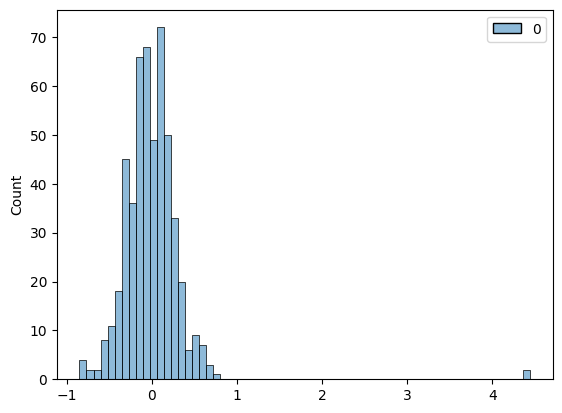

In [20]:
sns.histplot(text_embedding.tolist())

In [21]:
text_embedding.mean()

tensor(-0.0053, grad_fn=<MeanBackward0>)

In [22]:
text_embedding.std()

tensor(0.3816, grad_fn=<StdBackward0>)

In [23]:
(text_embedding**2).sum().sqrt()

tensor(8.6279, grad_fn=<SqrtBackward0>)

In [24]:
type((text_embedding**2).sum().sqrt().item())

float

## Ecom demo



In [25]:
from pathlib import Path

In [26]:
images = []
images.extend(Path("../../data/fashion-images/Footwear/Men/Images/images_with_product_ids").glob("*.jpg"))
images.extend(Path("../../data/fashion-images/Footwear/Women/Images/images_with_product_ids").glob("*.jpg"))

In [27]:
len(images)

1580

In [28]:
import numpy as np
from itertools import batched

In [29]:
from torchvision.utils import make_grid
from torchvision.io import read_image 
from torchvision import transforms

In [30]:
def get_text_embedding(text):
    # Load the CLIP model
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    inputs = clip_processor(text=[text], return_tensors="pt", padding=True)
    text_embeddings = clip_model.get_text_features(**inputs)
    return text_embeddings[0]

def load_transform_images(image_paths):
    target_size = (240, 240)
    reshape_transform = lambda image_tensor: transforms.Resize(target_size)(image_tensor).expand(3, -1, -1)
    images = [reshape_transform(read_image(image)) for image in image_paths]
    return images

def get_image_embeddings(image_paths):
    # Load the CLIP model
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    images = load_transform_images(image_paths)
    inputs = clip_processor(images=images, return_tensors="pt")
    image_embeddings = clip_model.get_image_features(**inputs)
    return image_embeddings

In [31]:
batch_size = 500
total_batches = int(np.ceil(len(images)/batch_size))

i = 0
embedding_files = []
for image_fps in batched(images, batch_size):
    i += 1
    print(f"Processing batch {i}/{total_batches}")
    file_name = f"../../data/fashion-images/embeddings/batch_{i}.pt"
    torch.save(get_image_embeddings(image_fps), file_name)
    embedding_files.append(file_name)

Processing batch 1/4
Processing batch 2/4
Processing batch 3/4
Processing batch 4/4


In [32]:
embedding_files

['../../data/fashion-images/embeddings/batch_1.pt',
 '../../data/fashion-images/embeddings/batch_2.pt',
 '../../data/fashion-images/embeddings/batch_3.pt',
 '../../data/fashion-images/embeddings/batch_4.pt']

In [33]:
image_embeddings = torch.cat([torch.load(fp) for fp in embedding_files])

/var/folders/bx/2xw9j1ps5d59rqp_x5g321sm0000gn/T/ipykernel_2345/1830714928.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image_embeddings = torch.cat([torch.load(fp) f

In [34]:
image_embeddings.shape

torch.Size([1580, 512])

In [35]:
image_embeddings[0]

tensor([-4.3364e-02, -9.2859e-02,  2.5458e-01,  2.7065e-01,  1.5352e-02,
         3.5271e-01, -8.7215e-02,  6.9782e-02,  2.0449e-01, -5.5492e-02,
         1.4400e-01,  1.4680e-02, -8.7086e-02, -2.9601e-03, -5.1384e-01,
         3.1628e-01,  1.1474e+00, -2.1061e-01,  4.0752e-01, -3.1801e-01,
        -1.6143e-01,  7.1010e-02,  1.5187e-01, -2.4529e-01, -3.5914e-02,
         4.1170e-01, -3.1976e-01,  5.9274e-02,  8.1350e-03, -1.0851e-01,
        -1.5622e-01,  1.7207e-01,  1.9103e-01,  3.7755e-02, -3.2703e-01,
        -1.7965e-01,  5.2396e-01,  3.2191e-01,  8.0509e-02,  3.0939e-01,
        -5.2298e-01, -5.3457e-01,  1.5862e-01, -7.1349e-01,  1.6625e-01,
        -4.4748e-01,  6.3192e-02,  9.3435e-02,  1.3049e-01, -2.2148e-01,
         2.5210e-01,  2.6211e-01,  1.2660e-01, -6.7017e-02, -2.4800e-01,
        -1.1422e-01, -9.2162e-02,  3.5712e-01, -2.4151e-01,  2.4801e-01,
         1.1241e+00,  1.8474e-02,  1.8145e-01,  3.9036e-02, -2.0264e-01,
        -1.1581e-01,  3.0876e-01,  2.4883e-01, -4.7

In [36]:
sum(image_embedding.element_size() for image_embedding in image_embeddings) / 1e3 # kb

6.32

In [37]:
from tqdm import tqdm

In [38]:
def rank_items(text_embedding: torch.Tensor, image_embeddings: torch.Tensor):
    scores = []
    cosine_similarity = torch.nn.CosineSimilarity()
    for image_embedding in tqdm(image_embeddings):
        score = cosine_similarity(text_embedding.unsqueeze(dim=0), image_embedding.unsqueeze(dim=0))
        scores.append(float(score))
    return scores

In [39]:
scores = rank_items(get_text_embedding("red"), image_embeddings)

  0%|          | 0/1580 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 1580/1580 [00:00<00:00, 33478.83it/s]


In [40]:
scores

[0.20604662597179413,
 0.18673951923847198,
 0.1776188313961029,
 0.16686542332172394,
 0.22831250727176666,
 0.14546051621437073,
 0.15590088069438934,
 0.17143964767456055,
 0.14486554265022278,
 0.13414312899112701,
 0.12867194414138794,
 0.17519696056842804,
 0.20336668193340302,
 0.17788317799568176,
 0.16150569915771484,
 0.16381670534610748,
 0.14689113199710846,
 0.18580684065818787,
 0.16882459819316864,
 0.1506204903125763,
 0.16046039760112762,
 0.16136766970157623,
 0.1645667999982834,
 0.17251238226890564,
 0.150290846824646,
 0.15493308007717133,
 0.1924905627965927,
 0.18303453922271729,
 0.14815925061702728,
 0.15430918335914612,
 0.17887668311595917,
 0.15197418630123138,
 0.1519579142332077,
 0.15201887488365173,
 0.17581649124622345,
 0.20043951272964478,
 0.1635349690914154,
 0.16140323877334595,
 0.1723843365907669,
 0.1800099015235901,
 0.15883609652519226,
 0.18016618490219116,
 0.18893945217132568,
 0.1445256918668747,
 0.17155390977859497,
 0.15704816579818726,

In [41]:
np.argsort(scores)

array([ 398,  111,  966, ...,  292, 1539, 1377])

In [42]:
idx = np.argsort(scores)
np.array(scores)[idx][::-1]

array([0.25029299, 0.24806112, 0.24227741, ..., 0.12555377, 0.12133288,
       0.11839144])

In [43]:
idx = np.argsort(scores)
np.array(images)[idx][::-1]

array([PosixPath('../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/44722.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/4743.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/41867.jpg'),
       ...,
       PosixPath('../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/59056.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/11983.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/26554.jpg')],
      dtype=object)

In [44]:
i = 0
for image in np.array(images)[idx][::-1]:
    i += 1
    print(image)
    if i >= 5:
        break

../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/44722.jpg
../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/4743.jpg
../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/41867.jpg
../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/15499.jpg
../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/14340.jpg


In [45]:
from IPython.display import display
from IPython.display import Image as DisplayImage



In [ ]:

i = 0
for image in np.array(images)[idx][::-1]:
    i += 1
    display(DisplayImage(image, width="200px"))
    if i >= 5:
        break

In [ ]:
target_size = (240, 240)  # Replace with your desired size
num_images = 32
resize_transform = transforms.Resize(target_size)
resized_images = [resize_transform(read_image(image)) for image in np.array(images)[idx][::-1][:num_images]]
grid = make_grid(resized_images)
transforms.ToPILImage()(grid)

In [48]:
def rank_items(text_embedding, image_embeddings):
    cosine_similarity = torch.nn.CosineSimilarity()
    scores = cosine_similarity(text_embedding.unsqueeze(dim=0), image_embeddings)
    return scores.tolist()


rank_items(get_text_embedding("red"), image_embeddings)

[0.20604662597179413,
 0.18673951923847198,
 0.1776188313961029,
 0.16686542332172394,
 0.22831250727176666,
 0.14546051621437073,
 0.15590088069438934,
 0.17143964767456055,
 0.14486554265022278,
 0.13414312899112701,
 0.12867194414138794,
 0.17519696056842804,
 0.20336668193340302,
 0.17788317799568176,
 0.16150569915771484,
 0.16381670534610748,
 0.14689113199710846,
 0.18580684065818787,
 0.16882459819316864,
 0.1506204903125763,
 0.16046039760112762,
 0.16136766970157623,
 0.1645667999982834,
 0.17251238226890564,
 0.150290846824646,
 0.15493308007717133,
 0.1924905627965927,
 0.18303453922271729,
 0.14815925061702728,
 0.15430918335914612,
 0.17887668311595917,
 0.15197418630123138,
 0.1519579142332077,
 0.15201887488365173,
 0.17581649124622345,
 0.20043951272964478,
 0.1635349690914154,
 0.16140323877334595,
 0.1723843365907669,
 0.1800099015235901,
 0.15883609652519226,
 0.18016618490219116,
 0.18893945217132568,
 0.1445256918668747,
 0.17155390977859497,
 0.15704816579818726,

In [49]:
def generate_product_feed(query, images, image_embeddings, num_images=32):
    scores = rank_items(get_text_embedding(query), image_embeddings)

    sort_idx = np.argsort(scores)
    ranked_images = np.array(images)[sort_idx][::-1][:num_images]

    target_size = (240, 240)
    reshape_transform = lambda image_tensor: transforms.Resize(target_size)(image_tensor).expand(3, -1, -1)
    resized_images = [reshape_transform(read_image(image)) for image in ranked_images]
    grid = make_grid(resized_images)
    display(transforms.ToPILImage()(grid))

    return ranked_images

In [ ]:
generate_product_feed("blue", images, image_embeddings)

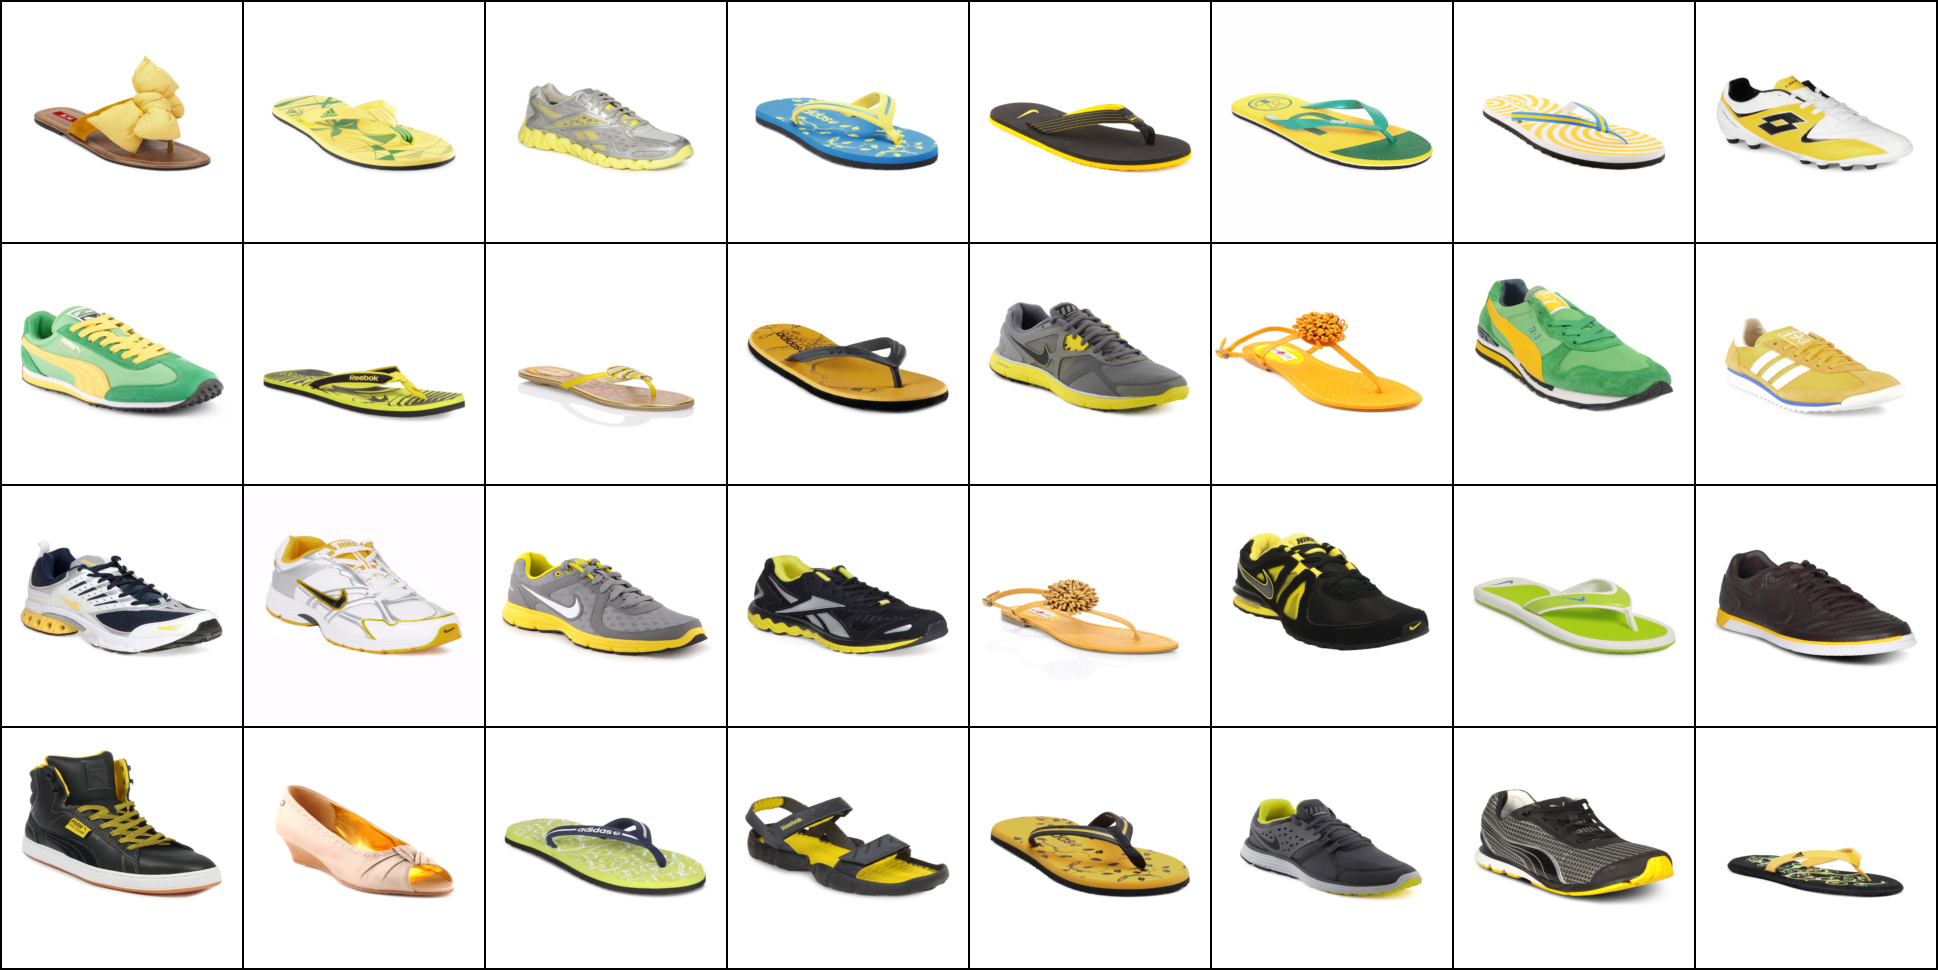

array([PosixPath('../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/56960.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/19928.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/4170.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/20947.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/5601.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/39546.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Women/Images/images_with_product_ids/19877.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/44785.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_ids/12903.jpg'),
       PosixPath('../../data/fashion-images/Footwear/Men/Images/images_with_product_i

In [51]:
generate_product_feed("lemon", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("lightweight", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("work", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("sports", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("soccer", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("fancy", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("fancy man shoe", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("scary", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("explosion", images, image_embeddings)

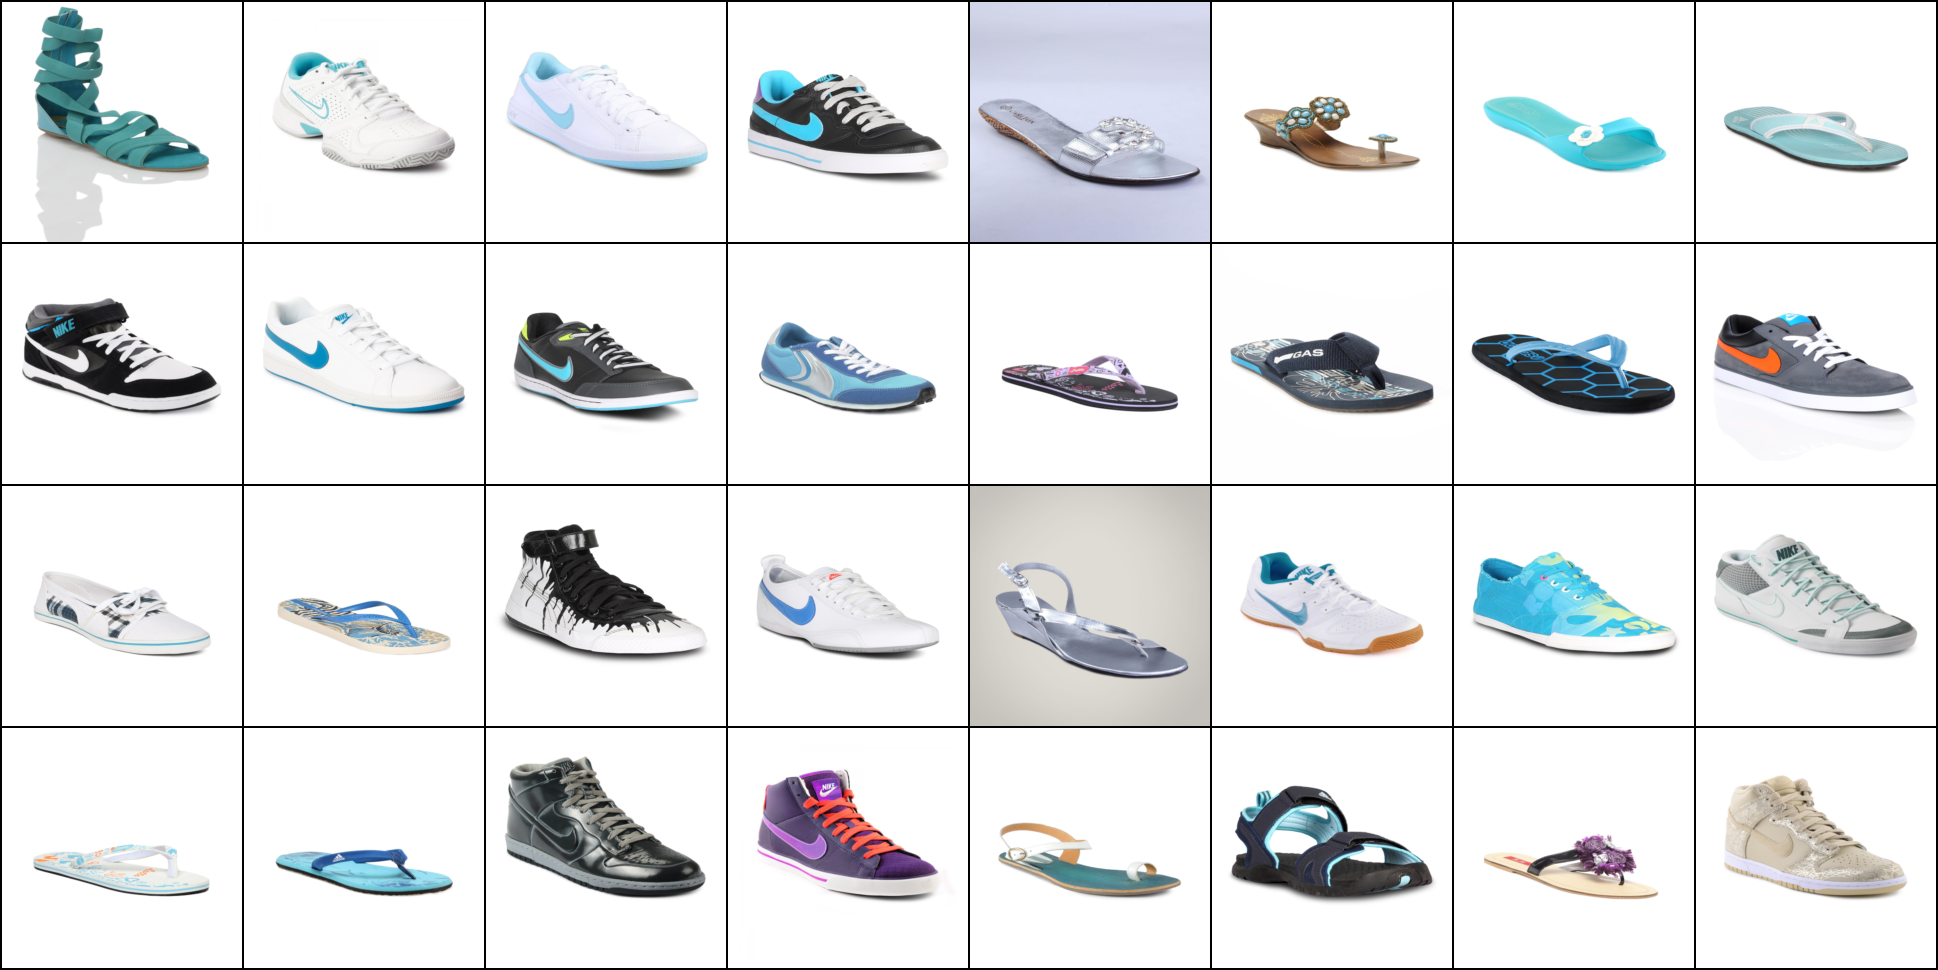

In [60]:
imgs = generate_product_feed("frozen", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("glass", images, image_embeddings)

In [ ]:
imgs = generate_product_feed("cinderella", images, image_embeddings)

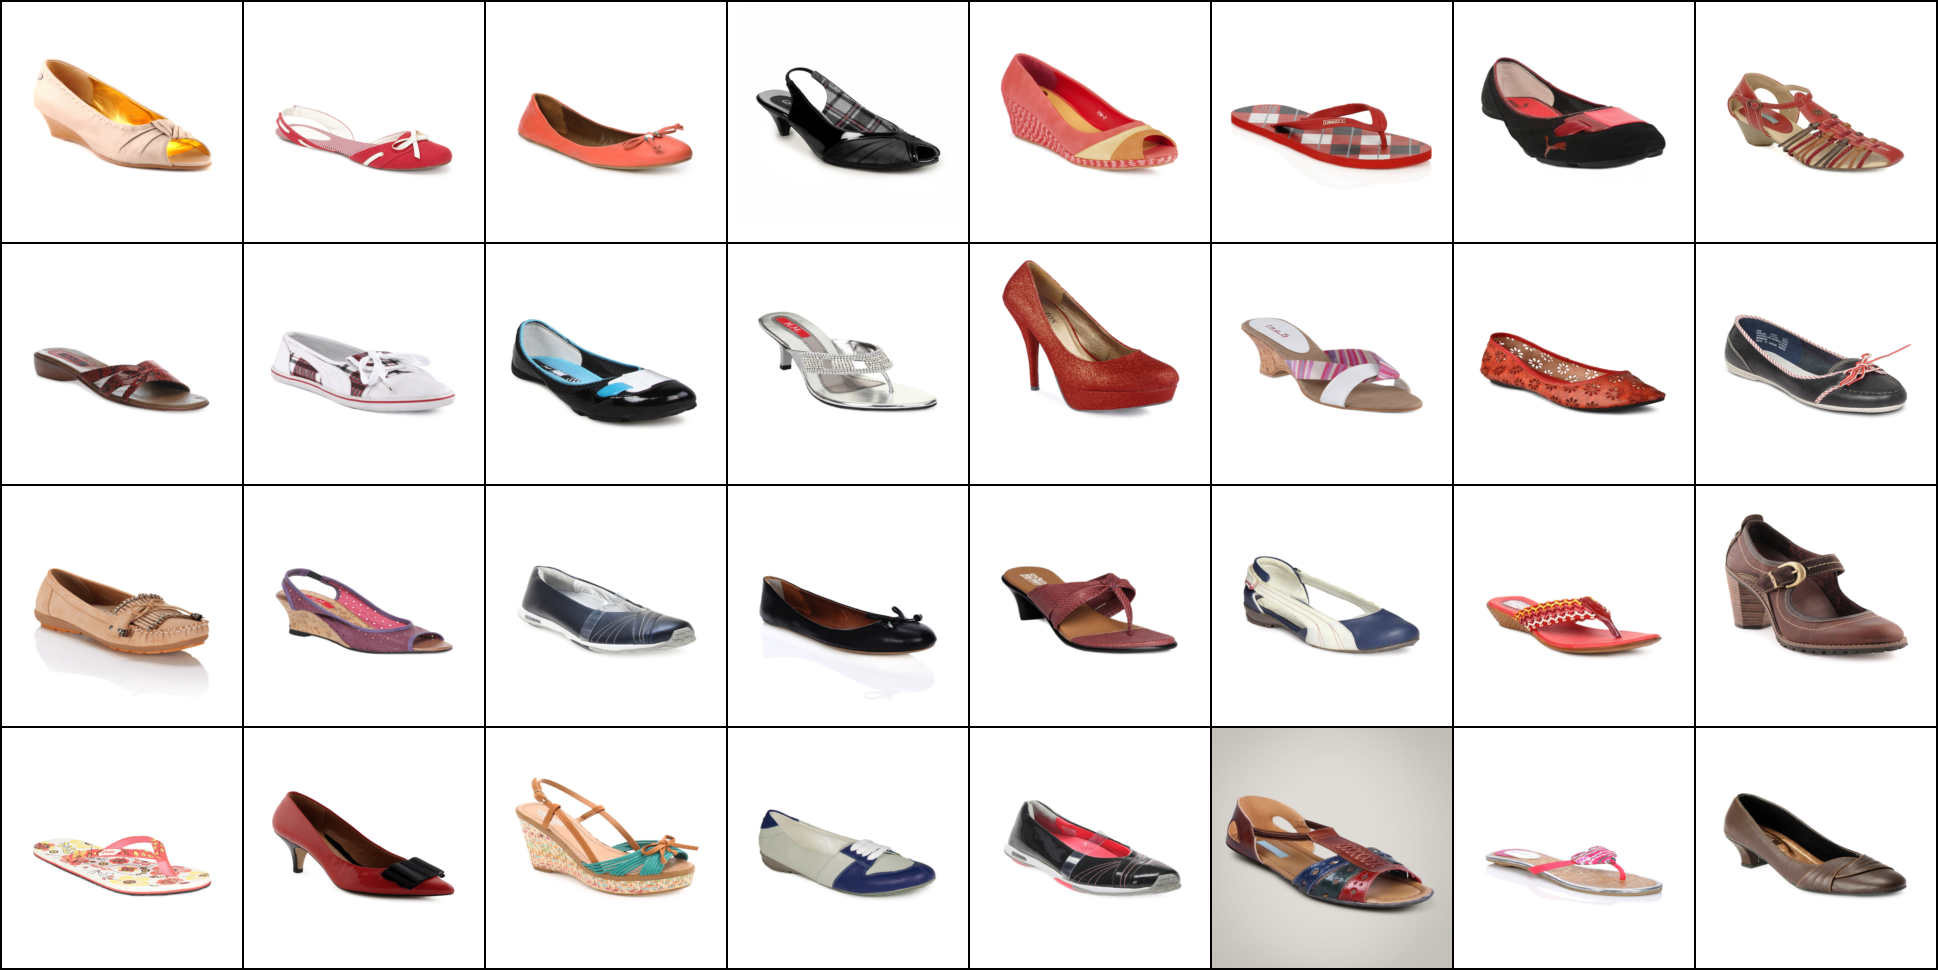

In [63]:
imgs = generate_product_feed("dorothy", images, image_embeddings)